# Linear Regression Example

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Load CSV file as Pandas DataFrame
df = pd.read_csv(Path('Resources/Salary_Data.csv'))
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


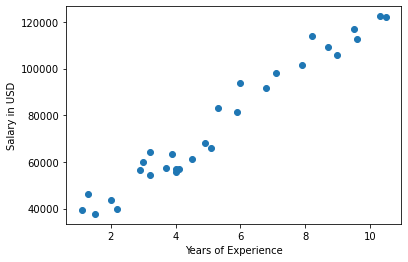

In [3]:
# inspect relationship between Year of Experience and Salary
plt.scatter(df.YearsExperience, df.Salary)
plt.xlabel('Years of Experience')
plt.ylabel('Salary in USD')
plt.show()

In [4]:
# format data to meet the requirements of the Scikit-learn library
# Conventionally, the independent variable is placed on the x-axis, dependend on the y-axis
# first argument of reshape() specifies the number of rows. -1 means number of rows is unspecified
# second argument of reshape() refers to the number of columns. 1 means there is only one column of independnent variables
# The data in the df column must be reshaped into an array with shape (num_samples, num_features)
# https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape
X = df.YearsExperience.values.reshape(-1, 1)

In [5]:
# examine first five entries in X
X[:5]

array([[1.1],
       [1.3],
       [1.5],
       [2. ],
       [2.2]])

In [6]:
# The shape of X is 30 samples, with a single feature (column)
X.shape

(30, 1)

In [7]:
# reshape the Salary column as for the dependent variable. reshape() was not needed in this instance
y = df.Salary

In [8]:
y[:5]

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [9]:
y.shape

(30,)

In [10]:
# object instantiated, or created, from skylearn.linear_model's LinearGregresion class
model = LinearRegression()

In [11]:
# learning stage, alternatively called fitting or training
model.fit(X, y)

LinearRegression()

In [12]:
# use predict() method to generate predictions
y_pred = model.predict(X)
print(y_pred.shape)

(30,)


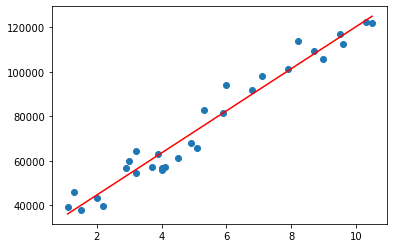

In [13]:
# Plot the predictions as a red line against the data
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [14]:
# examine specific parameters of model: the slope, model.ceof_, and the y-intercept, model.intercept_
print(model.coef_)
print(model.intercept_)

[9449.96232146]
25792.200198668717


In [15]:
# summarization of basic pattern for supervised learning using in linear regression example:

# 1. Split the data into input (X) and output (y)
# 2. Create an instance of the model with model = LinearRegression()
# 3. Train the model with the dataset with model.fit(X,y)
# 4. Create predictions with y_pred = model.predict(X)

# ---------------------------------------------------------------------------------------------------------------

 # Logistic Regression

 Logistic Regression is a statistical method for predicting binary outcomes from data.

 Examples of this are "yes" vs "no" or "high credit risk" vs "low credit risk".

 These are categories that translate to probability of being a 0 or a 1

We can calculate logistic regression by adding an activation function as the final step to our linear model.

This converts the linear regression output to a probability.

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

 # Generate some data

In [17]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=42)

print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: [0 1 0 1 1 0 1 1 0 0]
Data: [[-2.98837186  8.82862715]
 [ 5.72293008  3.02697174]
 [-3.05358035  9.12520872]
 [ 5.461939    3.86996267]
 [ 4.86733877  3.28031244]
 [-2.14780202 10.55232269]
 [ 4.91656964  2.80035293]
 [ 3.08921541  2.04173266]
 [-2.90130578  7.55077118]
 [-3.34841515  8.70507375]]


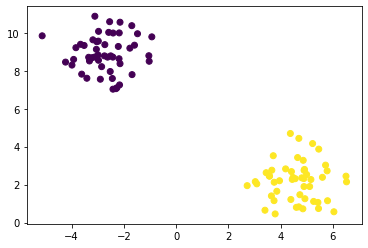

In [18]:
# Visualizing both classes
plt.scatter(X[:, 0], X[:, 1], c=y)

 # Split our data into training and testing

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

 # Create a Logistic Regression Model

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

# default settings: 
# LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#    intercept_scaling=1, max_iter=100, multi_class='warn', penalty='12',
#    random_state=1, solver='lbfgs' tol=0.0001, warm_start=False)

LogisticRegression(random_state=1)

 # Fit (train) or model using the training data

In [21]:
# Train the data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

 # Make predictions

In [22]:
# Predict outcomes for test data set
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,1,1
7,1,1
8,1,1
9,0,0


# Validate the model using the test data

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

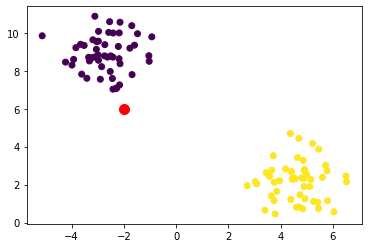

In [24]:
# Generate a new data point (the red circle)
import numpy as np
new_data = np.array([[-2, 6]])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)
plt.show()

In [25]:
# Predict the class (purple or yellow) of the new data point
predictions = classifier.predict(new_data)
print("Classes are either 0 (purple) or 1 (yellow)")
print(f"The new point was classified as: {predictions}")

Classes are either 0 (purple) or 1 (yellow)
The new point was classified as: [0]


In [26]:
# Summarizatin of Logistic_regression
# 1. Create a model with LogisticRegression().
# 2. Train the model with model.fit().
# 3. Make predictions with model.predict().
# 4. Validate the model with accuracy_score().

# ---------------------------------------------------------------------------------------------------------------

# Logistic Regression Example - Predicting Diabetes

In [27]:
from path import Path
import pandas as pd

In [28]:
data = Path('Resources/diabetes.csv')
df = pd.read_csv(data)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


 ## Separate the Features (X) from the Target (y)

In [29]:
y = df["Outcome"]
X = df.drop(columns="Outcome")

 ## Split our data into training and testing


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(576, 8)

 ## Create a Logistic Regression Model

In [31]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)

 ## Fit (train) or model using the training data

In [32]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

 ## Make predictions

In [33]:
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,1,0
8,1,1
9,0,0


In [34]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7760416666666666


## Precision Recall

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[113  12]
 [ 31  36]]


In [37]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       125
           1       0.75      0.54      0.63        67

    accuracy                           0.78       192
   macro avg       0.77      0.72      0.73       192
weighted avg       0.77      0.78      0.77       192



# ---------------------------------------------------------------------------------------------------------------

# SVM Example - Loan Approver

There are a number of classification algorithms that can be used to determine loan elgibility. Some algorithms run better than others. Build a loan approver using the SVM algorithm and compare the accuracy and performance of the SVM model with the Logistic Regression model.

In [38]:
from path import Path
import numpy as np
import pandas as pd

In [39]:
# Read in the data
# Note: The following data has been normalized between 0 and 1
data = Path('Resources/loans_svm.csv')
df = pd.read_csv(data)
df.head()

,assets,liabilities,income,credit_score,mortgage,status
0,0.210859,0.452865,0.281367,0.628039,0.302682,deny
1,0.395018,0.661153,0.330622,0.638439,0.502831,approve
2,0.291186,0.593432,0.438436,0.434863,0.315574,approve
3,0.458640,0.576156,0.744167,0.291324,0.394891,approve
4,0.463470,0.292414,0.489887,0.811384,0.566605,approve


 ## Separate the Features (X) from the Target (y)

In [40]:
# Segment the features from the target
y = df["status"]
X = df.drop(columns="status")

 ## Split our data into training and testing

In [41]:
# Use the train_test_split function to create training and testing subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(75, 5)

 ## Create a SVM Model

In [42]:
# Instantiate a linear SVM model
from sklearn.svm import SVC
model = SVC(kernel='linear')

 ## Fit (train) or model using the training data

In [43]:
# Fit the data
model.fit(X_train, y_train)

SVC(kernel='linear')

 ## Score the model using the test data

 ## Make predictions

In [44]:
# Make predictions using the test data
y_pred = model.predict(X_test)
results = pd.DataFrame({
    "Prediction": y_pred, 
    "Actual": y_test
}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,approve,deny
1,deny,approve
2,deny,deny
3,approve,deny
4,deny,deny


In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6

# Generate Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[7, 5],
       [5, 8]], dtype=int64)

 # Generate Classification Report

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     approve       0.58      0.58      0.58        12
        deny       0.62      0.62      0.62        13

    accuracy                           0.60        25
   macro avg       0.60      0.60      0.60        25
weighted avg       0.60      0.60      0.60        25



# ---------------------------------------------------------------------------------------------------------------

# Example - Dealing with Categorical Data in ML (Label & Encode)

In [48]:
# initial imports
import pandas as pd
from path import Path

## Dataset Information

The file `loans_data_categorical_lable_and_encode.csv`, contains simulated data about loans, there are a total of 500 records. Each row represents a loan application along an arbitrary year, where every column represents the following data about every loan application.

* `amount`: The loan amount in USD.
* `term`: The loan term in months.
* `month`: The month of the year when the loan was requested.
* `age`: Age of the loan applicant.
* `education`: Educational level of the loan applicant.
* `gender`: Gender of the loan applicant.
* `bad`: Stands for a bad or good loan applicant (`1` - bad, `0` - good).

In [49]:
# Load data
file_path = Path("Resources/loans_data_categorical_lable_and_encode.csv")
loans_df = pd.read_csv(file_path)
loans_df.head()

,amount,term,month,age,education,gender,bad
0,1000,30,June,45,High School or Below,male,0
1,1000,30,July,50,Bachelor,female,0
2,1000,30,August,33,Bachelor,female,0
3,1000,15,September,27,college,male,0
4,1000,30,October,28,college,female,0


In [50]:
# Binary encoding using Pandas (single column)
loans_binary_encoded = pd.get_dummies(loans_df, columns=["gender"])
loans_binary_encoded.head()

,amount,term,month,age,education,bad,gender_female,gender_male
0,1000,30,June,45,High School or Below,0,0,1
1,1000,30,July,50,Bachelor,0,1,0
2,1000,30,August,33,Bachelor,0,1,0
3,1000,15,September,27,college,0,0,1
4,1000,30,October,28,college,0,1,0


In [51]:
# Binary encoding using Pandas (multiple columns)
loans_binary_encoded = pd.get_dummies(loans_df, columns=["education", "gender"])
loans_binary_encoded.head()

,amount,term,month,age,bad,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,June,45,0,0,1,0,0,0,1
1,1000,30,July,50,0,1,0,0,0,1,0
2,1000,30,August,33,0,1,0,0,0,1,0
3,1000,15,September,27,0,0,0,0,1,0,1
4,1000,30,October,28,0,0,0,0,1,1,0


In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2 = loans_df.copy()
df2['education'] = le.fit_transform(df2['education']) 
df2.head()

,amount,term,month,age,education,gender,bad
0,1000,30,June,45,1,male,0
1,1000,30,July,50,0,female,0
2,1000,30,August,33,0,female,0
3,1000,15,September,27,3,male,0
4,1000,30,October,28,3,female,0


## Integer Encoding

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2 = loans_df.copy()
df2['education'] = le.fit_transform(df2['education'])

In [54]:
df2.head()

,amount,term,month,age,education,gender,bad
0,1000,30,June,45,1,male,0
1,1000,30,July,50,0,female,0
2,1000,30,August,33,0,female,0
3,1000,15,September,27,3,male,0
4,1000,30,October,28,3,female,0


# Custom Encoding

In [55]:
# Creating an instance of label encoder
label_encoder = LabelEncoder()
loans_df["month_le"] = label_encoder.fit_transform(loans_df["month"])
loans_df.head()

,amount,term,month,age,education,gender,bad,month_le
0,1000,30,June,45,High School or Below,male,0,6
1,1000,30,July,50,Bachelor,female,0,5
2,1000,30,August,33,Bachelor,female,0,1
3,1000,15,September,27,college,male,0,11
4,1000,30,October,28,college,female,0,10


In [56]:
# Months dictionary
months_num = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12,
}



In [57]:
# Months' names encoded using the dictionary values
loans_df["month_num"] = loans_df["month"].apply(lambda x: months_num[x])
loans_df.head()



,amount,term,month,age,education,gender,bad,month_le,month_num
0,1000,30,June,45,High School or Below,male,0,6,6
1,1000,30,July,50,Bachelor,female,0,5,7
2,1000,30,August,33,Bachelor,female,0,1,8
3,1000,15,September,27,college,male,0,11,9
4,1000,30,October,28,college,female,0,10,10


In [58]:
# Drop the month and month_le columns
loans_df = loans_df.drop(["month", "month_le"], axis=1)
loans_df.head()

,amount,term,age,education,gender,bad,month_num
0,1000,30,45,High School or Below,male,0,6
1,1000,30,50,Bachelor,female,0,7
2,1000,30,33,Bachelor,female,0,8
3,1000,15,27,college,male,0,9
4,1000,30,28,college,female,0,10


# ---------------------------------------------------------------------------------------------------------------

# Example - Dealing with Categorical Data in ML (Scale)

In [59]:
# initial imports
import pandas as pd
from path import Path

In [60]:
# Load data
file_path = Path("Resources/loans_data_encoded_scale.csv")
encoded_df = pd.read_csv(file_path)
encoded_df.head()

,amount,term,age,bad,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,0,6,0,1,0,0,0,1
1,1000,30,50,0,7,1,0,0,0,1,0
2,1000,30,33,0,8,1,0,0,0,1,0
3,1000,15,27,0,9,0,0,0,1,0,1
4,1000,30,28,0,10,0,0,0,1,1,0


## Scaling Data

In [61]:
# Creating the scaler instance
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()

In [62]:
# Fitting the scaler
# fit and transform steps are combined into a single fit_transfor() method.
# However, they can also be used sequentially with data_scaler.fit(), the data_scaler.transform()

loans_data_scaled = data_scaler.fit_transform(encoded_df)
loans_data_scaled[:5]

array([[ 0.49337687,  0.89789115,  2.28404253, -0.81649658, -0.16890147,
        -0.39336295,  1.17997648, -0.08980265, -0.88640526, -0.42665337,
         0.42665337],
       [ 0.49337687,  0.89789115,  3.10658738, -0.81649658,  0.12951102,
         2.54218146, -0.84747452, -0.08980265, -0.88640526,  2.34382305,
        -2.34382305],
       [ 0.49337687,  0.89789115,  0.3099349 , -0.81649658,  0.42792352,
         2.54218146, -0.84747452, -0.08980265, -0.88640526,  2.34382305,
        -2.34382305],
       [ 0.49337687, -0.97897162, -0.67711892, -0.81649658,  0.72633602,
        -0.39336295, -0.84747452, -0.08980265,  1.12815215, -0.42665337,
         0.42665337],
       [ 0.49337687,  0.89789115, -0.51260995, -0.81649658,  1.02474851,
        -0.39336295, -0.84747452, -0.08980265,  1.12815215,  2.34382305,
        -2.34382305]])

In [63]:
import numpy as np
print(np.mean(loans_data_scaled[:,0]))
print(np.std(loans_data_scaled[:,0]))

-3.552713678800501e-16
0.9999999999999999


# ---------------------------------------------------------------------------------------------------------------

# Example - Decision Trees

In [64]:
# Initial imports
import pandas as pd
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Loading and Preprocessing Loans Encoded Data

In [65]:
# Loading data
file_path = Path("Resources/loans_data_encoded_decision_trees.csv")
df_loans = pd.read_csv(file_path)
df_loans.head()

,amount,term,age,bad,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,0,6,0,1,0,0,0,1
1,1000,30,50,0,7,1,0,0,0,1,0
2,1000,30,33,0,8,1,0,0,0,1,0
3,1000,15,27,0,9,0,0,0,1,0,1
4,1000,30,28,0,10,0,0,0,1,1,0


In [66]:
# Define features set
X = df_loans.copy()
X = X.drop("bad", axis=1)
X.head()

,amount,term,age,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,6,0,1,0,0,0,1
1,1000,30,50,7,1,0,0,0,1,0
2,1000,30,33,8,1,0,0,0,1,0
3,1000,15,27,9,0,0,0,1,0,1
4,1000,30,28,10,0,0,0,1,1,0


In [67]:
# Define target vector
y = df_loans["bad"].values.reshape(-1, 1)
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [68]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [69]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 10)
(125, 10)
(375, 1)
(125, 1)


In [70]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=78, train_size=0.80)

In [71]:
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(400, 10)
(100, 10)
(400, 1)
(100, 1)


In [72]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [73]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [74]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Fitting the Decision Tree Model

In [75]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [76]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)

## Making Predictions Using the Tree Model

In [77]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)
predictions

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

## Model Evaluation

In [78]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
print(cm_df)
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

          Predicted 0  Predicted 1
Actual 0           52           32
Actual 1           22           19


In [79]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,52,32
Actual 1,22,19


Accuracy Score : 0.568
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.62      0.66        84
           1       0.37      0.46      0.41        41

    accuracy                           0.57       125
   macro avg       0.54      0.54      0.54       125
weighted avg       0.59      0.57      0.58       125



In [80]:
# Review classification report:

# Precision: Precision is the measure of how reliable a positive classification is.
# From our results, the precision for the good loan applications can be determined by the ratio TP/(TP + FP),
# which is 50/(50 + 22) = 0.69. The precision for the bad loan applications can be determined as follows: 19/(19 + 34) = 0.358.
# A low precision is indicative of a large number of false positives—of
# the 53 loan applications we predicted to be bad applications, 34 were actually good loan applications.

# Recall: Recall is the ability of the classifier to find all the positive samples.
# It can be determined by the ratio: TP/(TP + FN), or 50/(50 + 34) = 0.595 for the good loans and 19/(19 + 22) = 0.463
# for the bad loans. A low recall is indicative of a large number of false negatives.

# F1 score: F1 score is a weighted average of the true positive rate (recall) and precision,
# where the best score is 1.0 and the worst is 0.0.

# Support: Support is the number of actual occurrences of the class in the specified dataset.
# For our results, there are 84 actual occurrences for the good loans and 41 actual occurrences for bad loans.

# ---------------------------------------------------------------------------------------------------------------

# Example - Random Forest Model

In [81]:
# Initial imports.
import pandas as pd
from path import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Loading and Preprocessing Loans Encoded Data

In [82]:
# Loading data
file_path = Path("Resources/loans_data_encoded_random_forest_model.csv")
df_loans = pd.read_csv(file_path)
df_loans.head()

,amount,term,age,bad,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,0,6,0,1,0,0,0,1
1,1000,30,50,0,7,1,0,0,0,1,0
2,1000,30,33,0,8,1,0,0,0,1,0
3,1000,15,27,0,9,0,0,0,1,0,1
4,1000,30,28,0,10,0,0,0,1,1,0


# Preprocess The Data

In [83]:
# Define features set
X = df_loans.copy()
X = X.drop("bad", axis=1)
X.head()

,amount,term,age,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,6,0,1,0,0,0,1
1,1000,30,50,7,1,0,0,0,1,0
2,1000,30,33,8,1,0,0,0,1,0
3,1000,15,27,9,0,0,0,1,0,1
4,1000,30,28,10,0,0,0,1,1,0


In [84]:
# Define the target set.
y = df_loans["bad"].ravel()
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [85]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [86]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Fit The Random Forest Model

In [87]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=500, random_state=78) 

In [88]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Make Predictions Using the Testing Data

In [89]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)
predictions

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

# Evaluate The Model

In [90]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,50,34
Actual 1,26,15


In [91]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
acc_score

0.52

In [92]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,50,34
Actual 1,26,15


Accuracy Score : 0.52
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.60      0.62        84
           1       0.31      0.37      0.33        41

    accuracy                           0.52       125
   macro avg       0.48      0.48      0.48       125
weighted avg       0.54      0.52      0.53       125



# Rank The Importance of Features

In [93]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([0.05479564, 0.083734  , 0.42871538, 0.32290918, 0.01986699,
       0.02382607, 0.0025937 , 0.0238055 , 0.01947929, 0.02027425])

In [94]:
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.42871537959784756, 'age'),
 (0.322909180511852, 'month_num'),
 (0.08373400008559587, 'term'),
 (0.054795639837519644, 'amount'),
 (0.023826066130178958, 'education_High School or Below'),
 (0.023805501611235368, 'education_college'),
 (0.020274246776222464, 'gender_male'),
 (0.01986699331709372, 'education_Bachelor'),
 (0.019479294982300867, 'gender_female'),
 (0.0025936971501533874, 'education_Master or Above')]

# ---------------------------------------------------------------------------------------------------------------

# Example - Gradient Boosted Tree

  ### Preprocessing

In [95]:
import pandas as pd
from path import Path
# Load data
file_path = Path("Resources/loans_data_encoded_gradient_boosted_tree.csv")
loans_df = pd.read_csv(file_path)
loans_df.head()

,amount,term,age,bad,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,0,6,0,1,0,0,0,1
1,1000,30,50,0,7,1,0,0,0,1,0
2,1000,30,33,0,8,1,0,0,0,1,0
3,1000,15,27,0,9,0,0,0,1,0,1
4,1000,30,28,0,10,0,0,0,1,1,0


In [96]:
# Define features set
X = loans_df.copy()
X = X.drop("bad", axis=1)
X.head()

,amount,term,age,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,6,0,1,0,0,0,1
1,1000,30,50,7,1,0,0,0,1,0
2,1000,30,33,8,1,0,0,0,1,0
3,1000,15,27,9,0,0,0,1,0,1
4,1000,30,28,10,0,0,0,1,1,0


In [97]:
# Define target vector
y = loans_df["bad"].values

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=1)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

  ### Choose best learning rate

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)

    # Fit the model
    classifier.fit(X_train_scaled, y_train)
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier.score(
            X_train_scaled,
            y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier.score(
            X_test_scaled,
            y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.629
Accuracy score (validation): 0.512

Learning rate:  0.1
Accuracy score (training): 0.656
Accuracy score (validation): 0.520

Learning rate:  0.25
Accuracy score (training): 0.723
Accuracy score (validation): 0.536

Learning rate:  0.5
Accuracy score (training): 0.755
Accuracy score (validation): 0.560

Learning rate:  0.75
Accuracy score (training): 0.781
Accuracy score (validation): 0.520

Learning rate:  1
Accuracy score (training): 0.797
Accuracy score (validation): 0.472



  ### Create Gradient Boosting Classifier

In [100]:
# Choose a learning rate and create classifier
classifier = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.5,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)

# Fit the model
classifier.fit(X_train_scaled, y_train)

# Make Prediction
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).head(20)

,Prediction,Actual
0,0,1
1,0,1
2,0,0
3,1,0
4,0,1
5,1,1
6,0,1
7,0,0
8,0,0
9,0,0


  ### Evaluate the model

In [101]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.56


In [102]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)

# Displaying results
display(cm_df)

,Predicted 0,Predicted 1
Actual 0,49,16
Actual 1,39,21


In [103]:
# Generate classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.56      0.75      0.64        65
           1       0.57      0.35      0.43        60

    accuracy                           0.56       125
   macro avg       0.56      0.55      0.54       125
weighted avg       0.56      0.56      0.54       125



# ---------------------------------------------------------------------------------------------------------------

# Example - Oversampling

In [104]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from collections import Counter

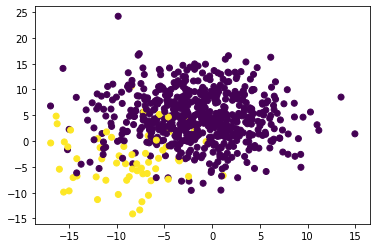

In [105]:
# Generate imbalanced dataset
X, y = make_blobs(n_samples=[600, 60], random_state=1, cluster_std=5)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [106]:
# Normal train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
Counter(y_train)

Counter({0: 451, 1: 44})

## Random Oversampling

In [107]:
# implement random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({0: 451, 1: 451})

In [108]:
# Logistic regression using random oversampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [109]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[131,  18],
       [  1,  15]], dtype=int64)

In [110]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.9083473154362416

In [111]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.88      0.94      0.93      0.91      0.82       149
          1       0.45      0.94      0.88      0.61      0.91      0.83        16

avg / total       0.94      0.88      0.93      0.90      0.91      0.82       165



## SMOTE

In [112]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy='auto').fit_resample(
    X_train, y_train
)
Counter(y_resampled)

Counter({0: 451, 1: 451})

In [113]:
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [114]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.9150587248322148

In [115]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[133,  16],
       [  1,  15]], dtype=int64)

In [116]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.89      0.94      0.94      0.91      0.83       149
          1       0.48      0.94      0.89      0.64      0.91      0.84        16

avg / total       0.94      0.90      0.93      0.91      0.91      0.83       165



# ---------------------------------------------------------------------------------------------------------------

# Example - Undersampling

Implement the cluster centroids and random undersampling techniques with the credit card default data. Then estimate a logistic regression model and report the classification evaluation metrics from both sampling methods. 

ln_balance_limit is the log of the maximum balance they can have on the card; 1 is female, 0 male for sex; the education is denoted: 1 = graduate school; 2 = university; 3 = high school; 4 = others; 1 is married and 0 single for marriage; default_next_month is whether the person defaults in the following month (1 yes, 0 no).

In [117]:
import pandas as pd
from path import Path
from collections import Counter

In [118]:
data = Path('Resources/cc_default_undersmapling.csv')
df = pd.read_csv(data)
df.head()

# Legend
# ln_balance_limit: maximum balance limit on a card
# sex: 1 = female, 0 = sex
# education: 1 = graduate school, 2 = university, 3 = high school, 4 = others
# marriage: 1 = married, 0 = single
# age: age of credit card holder
# default_next_month: 1 = yes, 0 = no

,ID,ln_balance_limit,sex,education,marriage,age,default_next_month
0,1,9.903488,1,2,0,24,1
1,2,11.695247,1,2,1,26,1
2,3,11.407565,1,2,1,34,0
3,4,10.819778,1,2,0,37,0
4,5,10.819778,0,2,0,57,0


In [119]:
x_cols = [i for i in df.columns if i not in ('ID', 'default_next_month')]
X = df[x_cols]
y = df['default_next_month']

In [120]:
# Normal train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Random Undersampling

In [121]:
# Undersample the data using `RandomUnderSampler`
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({0: 4968, 1: 4968})

In [122]:
# Fit a Logistic regression model using random undersampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [123]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[3732, 2100],
       [ 740,  928]], dtype=int64)

In [124]:
# Calculate the Balanced Accuracy Score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.5981363057701987

In [125]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.83      0.64      0.56      0.72      0.60      0.36      5832
          1       0.31      0.56      0.64      0.40      0.60      0.35      1668

avg / total       0.72      0.62      0.57      0.65      0.60      0.36      7500



## Cluster Centroid Undersampling

In [126]:
# Fit the data using `ClusterCentroids` and check the count of each class
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=1)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({0: 4968, 1: 4968})

In [127]:
# Logistic regression using cluster centroid undersampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=78)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=78)

In [128]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[2808, 3024],
       [ 596, 1072]], dtype=int64)

In [129]:
# Calculate the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.5620836664002131

In [130]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.82      0.48      0.64      0.61      0.56      0.30      5832
          1       0.26      0.64      0.48      0.37      0.56      0.31      1668

avg / total       0.70      0.52      0.61      0.56      0.56      0.31      7500



# ---------------------------------------------------------------------------------------------------------------

# Example - Combination Sampling

Implement the SMOTEENN technique with the credit card default data. Then estimate a logistic regression model and report the classification evaluation metrics.

ln_balance_limit is the log of the maximum balance they can have on the card; 1 is female, 0 male for sex; the education is denoted: 1 = graduate school; 2 = university; 3 = high school; 4 = others; 1 is married and 0 single for marriage; default_next_month is whether the person defaults in the following month (1 yes, 0 no).

In [142]:
import pandas as pd
from path import Path
from collections import Counter

In [143]:
data = Path('Resources/cc_default_combination_sampling.csv')
df = pd.read_csv(data)
df.head()

,ID,ln_balance_limit,sex,education,marriage,age,default_next_month
0,1,9.903488,1,2,0,24,1
1,2,11.695247,1,2,1,26,1
2,3,11.407565,1,2,1,34,0
3,4,10.819778,1,2,0,37,0
4,5,10.819778,0,2,0,57,0


In [144]:
x_cols = [i for i in df.columns if i not in ('ID', 'default_next_month')]
X = df[x_cols]
y = df['default_next_month']

In [145]:
x_cols

['ln_balance_limit', 'sex', 'education', 'marriage', 'age']

In [146]:
Counter(y)

Counter({1: 6636, 0: 23364})

In [147]:
# Normal train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Combination Sampling with SMOTEENN

In [148]:
# Use the SMOTEENN technique to perform combination sampling on the data
# Count the resampled classes
from imblearn.combine import SMOTEENN

# smote_enn = SMOTEENN(random_state=0)
# X_resampled, y_resampled = smote_enn.fit_resample(X, y)
# Counter(y_resampled)

# Logistic Regression

In [149]:
# Fit a Logistic regression model using random undersampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

# Evaluation Metrics

In [150]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[2808, 3024],
       [ 596, 1072]], dtype=int64)

In [151]:
# Calculate the Balanced Accuracy Score
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.5620836664002131

In [152]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.82      0.48      0.64      0.61      0.56      0.30      5832
          1       0.26      0.64      0.48      0.37      0.56      0.31      1668

avg / total       0.70      0.52      0.61      0.56      0.56      0.31      7500

